Building prefix dict from C:\Users\user\1104_wordscloud\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.ue0e472f4c2cdda81675f1577f30e1187.cache
Loading model cost 0.934 seconds.
Prefix dict has been built successfully.


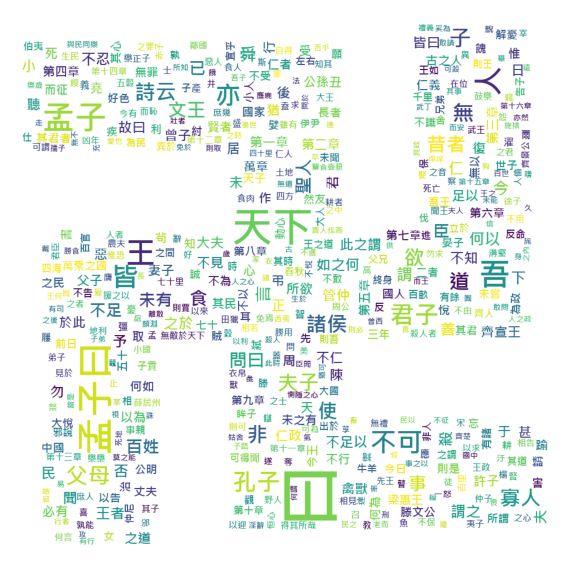

In [1]:
# WordCloud01

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

text = open('munzu.txt', "r",encoding="utf-8").read()  #讀文字資料
 
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

font = "C:\Windows\Fonts\微軟正黑體\msjhbd.ttc"  #設定字型
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("mask_wan.jpg"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font, font_step=-20, max_words=500)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(10,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("Munzu_Wordcloud.png")  #存檔